#### $\text{BioStat 558: Homework I}$
#### $\text{Madison Sanchez-Forman}$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from tabulate import tabulate
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression

np.random.seed(123)
sns.set_theme(font='Times New Roman', palette='magma')

#### $\text{Problem 1}$
<!-- 1 a -->
$\text{a) Minimizing least squares is the procedure that allows us to find estimates of the coefficients in linear regression such that our predictions}$
$\text{are as close to the actual data points as possible. This creates the line of best fit. To find these coefficients, we want to minimize the distance between our predicted}$
$\hat{Y}\text{ given an observation X, and the actual (X,Y) from the training set.}$
$\text{This is often done by minimizing the residuals from our model, or the difference between}$
$\text{our models prediction, }\hat{Y} \text{, and the actual Y of the training response variable.}$

$\text{Let }Y=\beta_0 + \beta_1 X_1 + \epsilon_{1} \text{ and } Y=\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon_{2}$

$\text{Then, }$

$RSS_1=\sum_{i=1}^{n}e_1 ^2 =(y_i - \hat{\beta_0} - \hat{\beta_1}x_1)^2$

$RSS_{12} =\sum_{i=1}^{n}e_{1i}^2=\sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}x_1 - \hat{\beta_2}x_2)^2$

$\text{We can see that the first model is a more restrictive version of the second. In the second model, if }\beta_2=0\text{ minimizes }RSS_{12}$ $\text{then model 2 will find that. In contrast, model 1 can be thought of as ignoring the second feature } X_2 \text{ no matter what, leaving the possibility that}$
$\text{there exists a different } \beta_2 \text{that would allow for the RSS to be even smaller. Similarly, we know that the RSS of the more flexible model will be}$
$\text{at least as small as the less flexible model because of this additional parameter.}$

$\therefore RSS_{12} \leq RSS_1$


<!-- 1 b -->
$\text{b) } R^2 \text{ represents the proportion of variance explained by the fitted model. Values close to 0 indicate that the regression is not explaining the variance}$
$\text{in the response variable, and values close to 1 indicate the opposite.}$

$R^2 := 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{f}({x_i}))^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} = 1 -\frac{RSS}{TSS}$

<!-- rss = actual - predicted
tss = actual - mean -->
$\text{RSS we saw in the previous problem, and represents the amount of variability left } \underline{unexplained} \text{ after pefroming regression.}$
$\text{Mathematically, the actual values minus the predicted values from the model.}$
$\text{In contrast, TSS represents the } \underline{inherent} \text{ variability in the response Y. This means that TSS will be the same for both models.}$
$\text{Or, the actual values minus the mean values.}$

$\text{Earlier we proved that the model with two features, } X_1 \text{ and } X_2 \text{will have at least the same amount or less variability explained}$
$\text{as a model with only } X_1 \text{ when trained on the same data. Therefore, we know that for the model with the additional feature, } R^2$ 
$\text{ will be greater than or equal to the }R^2 \text{of the model with a single feature. In other words, adding more features will never reduce the amount}$
$\text{of variability explained by a model with a single feature, it will only increase it}$

$\therefore R^2_1 \leq R^2_2$

<!-- 1 c --> 
$\text{c) Adding features does not inherently increase } R^2 \text{. It is only substantially increased if the additional feature includes information that signifigantly reduces RSS.}$
$\text{Otherwise, the additional features can lead the model to overfitting by reducing bias and increasing variance. Where the model performs extremely}$
$\text{well on the training data, but fails to adapt to the testing data.}$

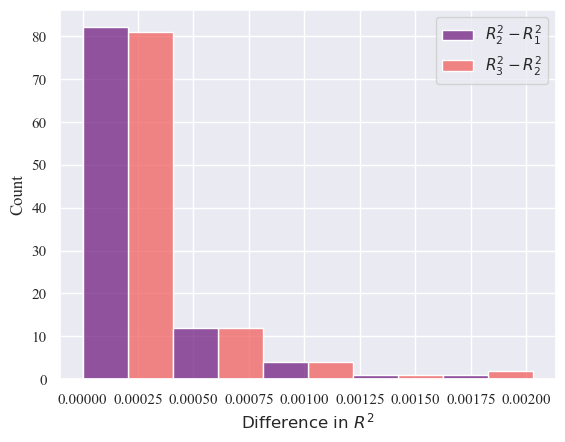

In [ ]:
# 1e
def find_test_r_squared(model: LinearRegression, 
                        Y_train: 
                        np.ndarray, 
                        X_test: np.ndarray, 
                        Y_test: np.ndarray) -> float:
    """
    Helper function to calcuate R² on testing data for simulation below

    Params
    ---------
    model: 1/3 models shown below that we are currently calculating the R² for
    Y_train: training response var
    X_test: testing feature var
    Y_test: testing response var

    Returns
    -------
    R² = 1 - (RSS/TSS) of the model on the testing data 
    """
    if len(X_test.shape) == 1:
        X_test = X_test.reshape(-1, 1)

    y_pred = model.predict(X_test)
    mu_Y_train = np.mean(Y_train)

    RSS = np.sum((Y_test - y_pred)**2)
    TSS = np.sum((Y_test - mu_Y_train)**2)
    return 1 - (RSS/TSS)

def graphing(training_df: pd.DataFrame, 
             differences_df: pd.DataFrame, 
             testing_df: pd.DataFrame,
             do_testing: bool = False) -> None:
    """
    Graphs results from simulation depending on if we are interested in
    testing R² or not

    Params
    -------
    train_results: R² of the model on the training set
    test_results: R² of the model on the testing set
    diff_results: difference between the R² of models with more and less features
    do_testing: whether to calculate the R² of the model on the testing set
    """
    model_names = [
        r'$Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$',
        r'$Y_i = \beta_0 + \beta_1 X_i + \beta_2 Z_i + \epsilon_i$',
        r'$Y_i = \beta_0 + \beta_1 X_i + \beta_2 Z_i + \beta_3 \text{sin}(X_i) + \epsilon_i$'
    ]
    do_kde = True
    if do_testing:
        for i, model in enumerate(['model1', 'model2', 'model3']):
            fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))
            fig.suptitle(model_names[i])
            # Training R²
            # sns.boxplot(data=training_df[f'train_{model}'], ax=axes[0], showfliers=True)
            sns.histplot(data=training_df[f'train_{model}'], ax=axes[0], kde=do_kde)
            axes[0].set_xlabel(r'$\text{Training } R^2$')
            
            # Testing R²
            # sns.boxplot(data=testing_df[f'test_{model}'], ax=axes[1], showfliers=True)
            sns.histplot(data=testing_df[f'test_{model}'], ax=axes[1], kde=do_kde)
            axes[1].set_xlabel(r'$\text{Testing } R^2$')
            axes[1].set_ylabel('')
    else:
        # Plot differences in R² of models with more and less features
        diff_data = differences_df[['diff_model2_1', 'diff_model3_2']]
        diff_data.columns = [r'$R^2_2 - R^2_1$', r'$R^2_3 - R^2_2$']
        ax = sns.histplot(data=diff_data, multiple='dodge', bins=5, palette='magma')
        ax.set_xlabel(r'$\text{Difference in } R^2$')

def f(X):
    return 2 - 3*X + np.random.normal(0, 2, len(X))
def simulate_once(n: int = 200, do_testing: bool = False) -> tuple[list[float], 
                                                                   list[float], 
                                                                   list[float]]:
    """
    Part 1d) of homework 2. Simulation to empirically verify the R² of the model
    with one feature is no greater than the R² of the model with two or more features.

    Params
    -------
    n: number of observations in the training set
    do_testing: whether to calculate the R² of the model on the testing set

    Returns
    -------
    r2_train: R² of the model on the training set
    r2_test: R² of the model on the testing set
    differences: difference between the R² of models with more and less features
    """
    X_train = np.random.normal(0, 3, n)
    Z_train = np.random.exponential(1/4, n)
    Y_train = f(X_train)
    
    # Model 1: Yi = β0 + β1Xi + ϵi
    model1 = LinearRegression()
    model1.fit(X_train.reshape(-1, 1), Y_train)
    train_r2_1 = model1.score(X_train.reshape(-1, 1), Y_train)
    
    # Model 2: Yi = β0 + β1Xi + β2Zi + ϵi
    X2_train = np.column_stack((X_train, Z_train))
    model2 = LinearRegression()
    model2.fit(X2_train, Y_train)
    train_r2_2 = model2.score(X2_train, Y_train)
    
    # Model 3: Yi = β0 + β1Xi + β2Zi + β3 sin(Xi) + ϵi
    X3_train = np.column_stack((X_train, Z_train, np.sin(X_train)))
    model3 = LinearRegression()
    model3.fit(X3_train, Y_train)
    train_r2_3 = model3.score(X3_train, Y_train)
    
    r2_train = [train_r2_1, train_r2_2, train_r2_3]
    differences = [train_r2_2 - train_r2_1, train_r2_3 - train_r2_2]

    r2_test = []
    if do_testing:
        # Test data 
        X_test = np.random.normal(0, 3, n)
        Z_test = np.random.exponential(1/4, n)
        Y_test = f(X_test)
        
        # Calculate test Rsquared
        test_r2_1 = find_test_r_squared(model1, Y_train, X_test, Y_test)
        
        X2_test = np.column_stack((X_test, Z_test))
        test_r2_2 = find_test_r_squared(model2, Y_train, X2_test, Y_test)
        
        X3_test = np.column_stack((X_test, Z_test, np.sin(X_test)))
        test_r2_3 = find_test_r_squared(model3, Y_train, X3_test, Y_test)
        
        r2_test = [test_r2_1, test_r2_2, test_r2_3]
    
    return r2_train, r2_test, differences

        
def run_simulation(b=100, do_testing=False) -> None:
    """
    Runs the simulation b times and stores the results in a dictionary.
    Then calls graphing function.

    Params
    -------
    b: number of simulations to run
    do_testing: whether to calculate the R² of the model on the testing set
    """
    training_r2 = {
    'train_model1': [],
    'train_model2': [],
    'train_model3': [],
    }
    testing_r2 = {
        'test_model1': [],
        'test_model2': [],
        'test_model3': []
    }
    differences = {
        'diff_model2_1': [],
        'diff_model3_2': []
    }
    for _ in range(b):
        r2_train, r2_test, diffs = simulate_once(do_testing=do_testing)
        training_r2['train_model1'].append(r2_train[0])
        training_r2['train_model2'].append(r2_train[1])
        training_r2['train_model3'].append(r2_train[2])
        
        if do_testing:
            testing_r2['test_model1'].append(r2_test[0])
            testing_r2['test_model2'].append(r2_test[1])
            testing_r2['test_model3'].append(r2_test[2])
            
        differences['diff_model2_1'].append(diffs[0])
        differences['diff_model3_2'].append(diffs[1])
    training_df = pd.DataFrame(training_r2)
    differences_df = pd.DataFrame(differences)
    testing_df = None
    if do_testing:
        testing_df = pd.DataFrame(testing_r2)
    graphing(training_df, differences_df, testing_df, do_testing)


run_simulation(do_testing=False)

$\text{In 1b) we established that adding more features will never decrease the amount of variance explained by the model, only increase it.}$
$\text{Here, we plotted the difference between the} R^2 \text{ values of three different models of increasing complexity. Notably, the difference between the }$
$R^2 \text{ of different models is most often 0, or slightly larger than, but it is never less than 0. Meaning the values may slightly increase for some instances}$
$\text{of the simulation, but not signifigantly and they do not decrease from the simplest model }(R^2_{1}) $

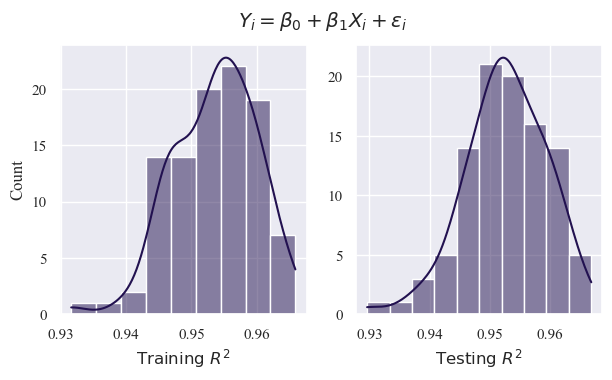

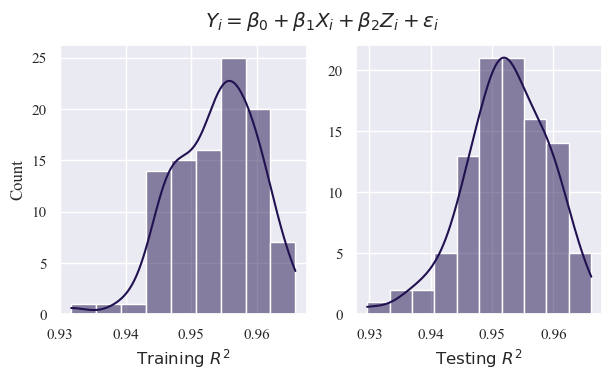

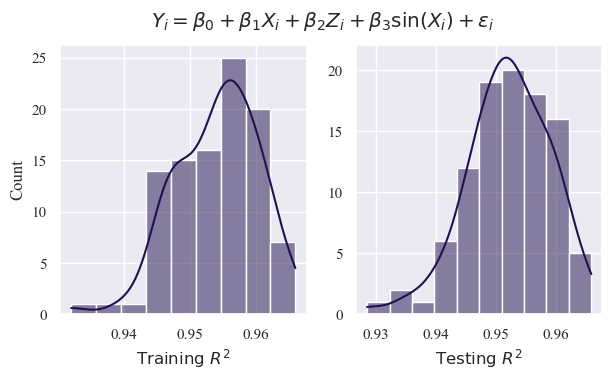

In [9]:
# 1e: Calculate test R2 
run_simulation(do_testing=True)

$\text{f) Here we can see through these histograms that increasing model complexity is not having a signifigant impact on } R^2.$
$\text{In the first graph, we can see both }R^2 \text{are very similar for training and testing, which indicates that this model is not over}$
$\text{ or under fitting. If this were underfitting, we would see a low training and testing score and if it were overfitting we would see a}$
$\text{high training score but low testing. This shows us that the linear model has a good bias-variance tradeoff for our dataset.}$

$\text{Furthermore, in the last two models. We see very similar distributions for training and testing of both models. Specifically, }$
$\text{The training }R^2 \text{of the last two models is a indentical distribution. Since we know that the true model is: }$
$Y = 2 - 3*X_i + \epsilon_i$
$\text{We know that X has a linear relationship with Y. In the final two models, we add terms that are not at all relevant to the model,}$ 
$\text{therefore, we do not see any added benefit from adding these variables to our model.}$